In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import a_builder as abld

In [38]:
#Some constants
# Define constants
# Define constants

sol_to_earth = 332946.078
AU = 1.496e+13 #cm
M_sun = 1.989e+33 #g

a_min = 0.35  # Minimum semi-major axis 
a_max = 4.0   # Maximum semi-major axis

n_pl = 260    # Number of planetesimals
n_emb = 26    # Number of planetary embryos

m_pl = 2.7932451e-8  # Mass of each planetesimal
m_emb = 2.7932451e-7  # Mass of each planetary embryo

r_emb = 2.39e-5 #radius of embryo
r_pl = 1.11e-5 #radius of planetesimal

n_steps = 100 #steps of dividing the disk

m_tot = n_pl * m_pl + n_emb * m_emb #total mass in the disk

In [3]:
alpha = -1
semis_pl = abld.inverse_cdf(alpha, n_pl, a_min, a_max)
semis_emb = abld.inverse_cdf(alpha, n_emb, a_min, a_max)
filename_pl = f"a_{int(alpha*10)}_pl.txt" 
filename_emb = f"a_{int(alpha*10)}_emb.txt" 
np.savetxt(filename_pl, semis_pl)
np.savetxt(filename_emb, semis_emb)

In [4]:
dm, cum_m, dsigma = abld.disk_mass_check(semis_pl, m_pl, n_pl, n_steps, a_min, a_max)

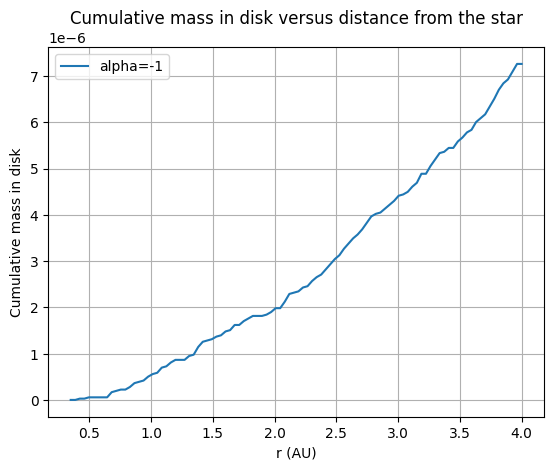

In [5]:
r = np.linspace(a_min,a_max,n_steps)

plt.plot(r,cum_m, label = f'alpha={alpha}')

plt.xlabel('r (AU)')
plt.ylabel('Cumulative mass in disk')

plt.title('Cumulative mass in disk versus distance from the star')
plt.legend()
plt.grid(True)
plt.show()

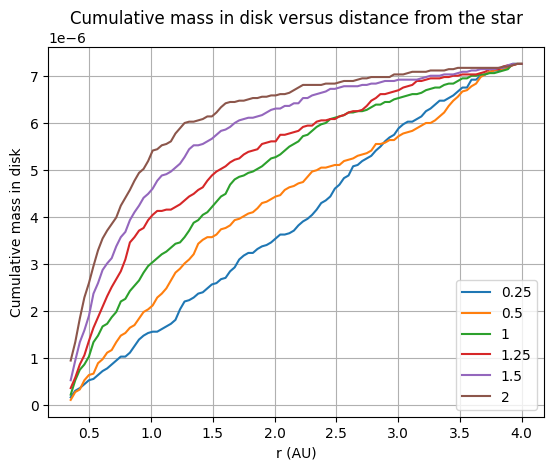

In [6]:
powers = [0.25, 0.5, 1, 1.25, 1.5, 2]
r = np.linspace(a_min,a_max,n_steps)
for power in powers:
    semis = abld.inverse_cdf(power, n_pl, a_min, a_max)
    dm, cum_m, dsigma = abld.disk_mass_check(semis, m_pl, n_pl, n_steps, a_min, a_max)
    plt.plot(r,cum_m, label = power)

plt.xlabel('r (AU)')
plt.ylabel('Cumulative mass in disk')

plt.title('Cumulative mass in disk versus distance from the star')
plt.legend()
plt.grid(True)
plt.show()
    

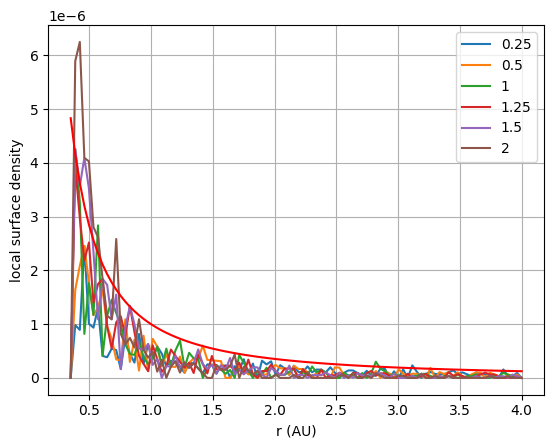

In [7]:
for power in powers:
    semis = abld.inverse_cdf(power, n_pl, a_min, a_max)
    dm, cum_m, dsigma = abld.disk_mass_check(semis, m_pl, n_pl, n_steps, a_min, a_max)
    plt.plot(r,dsigma, label = power)

plt.plot(r, 1e-6*r**-1.5, color = 'red')
plt.xlabel('r (AU)')
plt.ylabel('local surface density')

plt.legend()
plt.grid(True)
plt.show()

For Chambers et al. 2013

In [48]:
b = 8 #g/cm^2
m_nonlinear = 4 * np.pi * b * AU**2 * (np.sqrt(2) - np.sqrt(0.7))
n_pl_ch = 140
n_emb_ch = 14
m_tot_ch = 14*m_emb + 140*m_pl
m_r = m_tot_ch - (m_nonlinear/M_sun)

frac_linear = m_r / m_tot
n_pl_lin = frac_linear * n_pl
n_emb_lin = frac_linear * n_emb
print("number of pl in linear regime = ", n_pl_lin, "in non linear = ", n_pl_ch - n_pl_lin)
print("number of emb in linear regime = ", n_emb_lin, "in non linear = ", n_emb_ch - n_emb_lin)


number of pl in linear regime =  23.055053190432485 in non linear =  116.94494680956751
number of emb in linear regime =  2.3055053190432484 in non linear =  11.694494680956751


In [49]:
a_pl_ch1, a_pl_ch2 = abld.inverse_cdf_two_parts(-1, 1.5, 23, 117, 0.3, 0.7, 2)
a_emb_ch1, a_emb_ch2 = abld.inverse_cdf_two_parts(-1, 1.5, 2, 12, 0.3, 0.7, 2)

In [50]:
a_pl_ch = np.concatenate((a_pl_ch1, a_pl_ch2))
a_emb_ch = np.concatenate((a_emb_ch1, a_emb_ch2))

In [56]:
dm_pl, cum_m_pl, dsigma_pl = abld.disk_mass_check(a_pl_ch, m_pl, 140, 100, 0.3, 2)
dm_emb, cum_m_emb, dsigma_emb = abld.disk_mass_check(a_emb_ch, m_pl, 14, 100, 0.3, 2)


In [57]:
cum_m2[0] = cum_m1[-1]

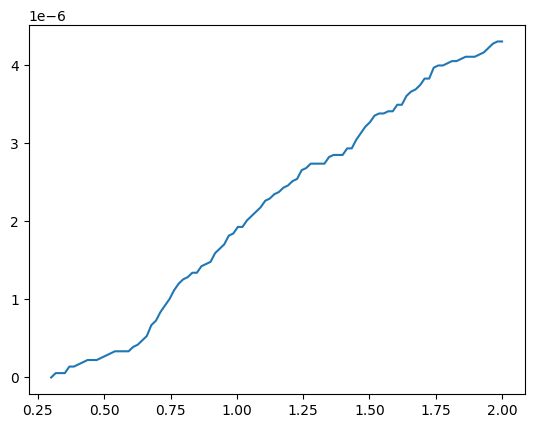

In [58]:
plt.plot(np.linspace(0.3, 2, 100), cum_m_pl+cum_m_emb)

plt.show()

In [59]:
np.savetxt('a_pl_chambers.txt', a_pl_ch)
np.savetxt('a_emb_chambers.txt', a_emb_ch)